# Scala's repository data

Scala is an open source project that has recently become in a prominent language for data scientists.

I this notebook we're going to read in and visualize the real world project repository of Scala to find out who has had the most influence on its development and who are the experts in a recently changed pull request.

The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:

- ```pulls_2011-2013.csv``` contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
- ```pulls_2014-2018.csv``` contains identical information, and spans from 2014 up to 2018.
- ```pull_files.csv``` contains the files that were modified by each pull request.

# 0. Import libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Overview

In [4]:
pulls_one = pd.read_csv('pulls_2011-2013.csv')
pulls_two = pd.read_csv('pulls_2014-2018.csv')
pull_files = pd.read_csv('pull_files.csv')

In [11]:
pulls_one.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [12]:
pulls_two.head()

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


In [13]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


# 2. Preparing data

First, we will combine the data from the two separate pull DataFrames. Next, we need to convert the strings into Python's DateTime objects because raw data extracted from GitHub contains dates in the ISO8601 format, however, pandas imports them as regular strings. 

The pull request times are all in UTC (Coordinated Universal Time). The commit times, however, are in the local time of the author with time zone information, so we should convert all times to UTC to make comparisons easy.

At final we'll merge the two DataFrames because the data extracted also comes in two separate files.

In [14]:
pulls = pulls_one.append(pulls_two)

pulls['date'] = pd.to_datetime(pulls['date'],utc = True)

In [15]:
pulls.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00


In [16]:
data = pulls.merge(pull_files, on = 'pid')

In [17]:
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


# 3. Project activity

The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date. We will do this by plotting a chart of the project's activity.

<AxesSubplot:xlabel='month,year'>

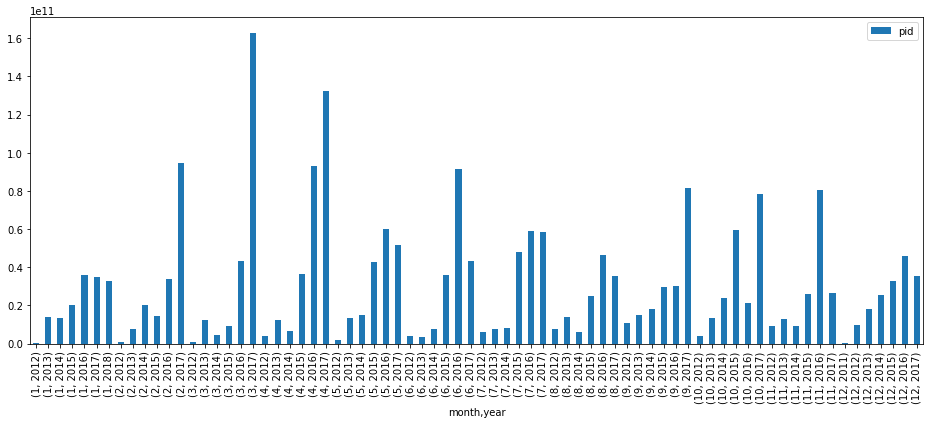

In [27]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
counts = data.groupby(['month','year']).sum()

counts.plot(kind = 'bar', figsize = (16,6))

## Dynamics of the community

We will plot a histogram of the number of pull requests submitted by each user. A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors.

<AxesSubplot:ylabel='Frequency'>

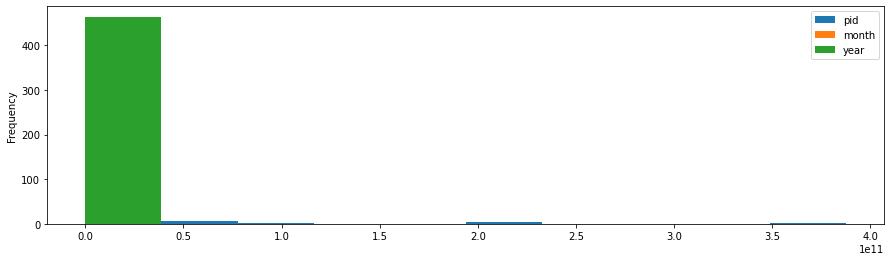

In [29]:
by_user = data.groupby('user').sum()

by_user.plot(kind='hist', figsize = (15,4))

## Latest pull requests 

Some parts of the code might be stable, some might be dead. Therefore it is important to understand the parts of the system that have been recently changed.

In [37]:
last_10 = pulls.sort_values('date',ascending = False).head(10)
joined_pr = last_10.merge(pull_files, on = 'pid')
files = set(joined_pr['file'])

files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## Most pull requests to a given file

We identified ```src/compiler/scala/reflect/reify/phases/Calculate.scal``` as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.

In [34]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file'] == file]

author_counts = file_pr.groupby('user').sum()
author_counts

,pid,month,year
user,,,
bjornregnell,5291974,4,2013
densh,3290864,12,2012
gkossakowski,3918789,1,2013
melloc,3854688,1,2013
odersky,2327900,8,4024
paulp,5009171,19,4024
retronym,47805330,32,10066
soc,14046225,24,8050
starblood,4786005,3,2013


## Latest pull requests by user

In [38]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'
file_pr = data[data['file'] == file]
joined_pr = file_pr.merge(pulls,on='pid')

users_last_10 = set(joined_pr.nlargest(10,'date_x')['user_x'])
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

## Special developers

We want to find the person who was most involved in the project in recent times. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.

<AxesSubplot:xlabel='date'>

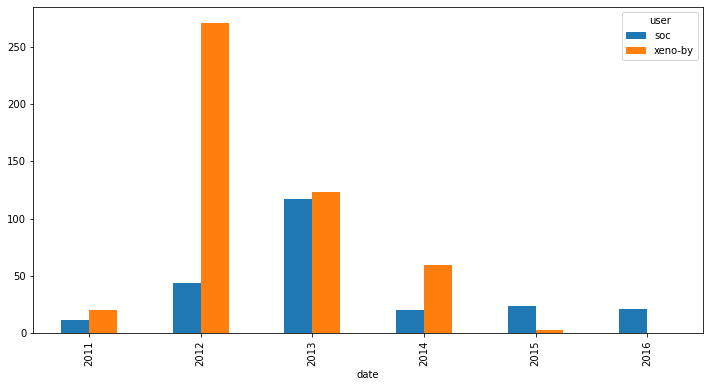

In [40]:
authors = ['xeno-by', 'soc']
by_author = pulls[pulls['user'].isin(authors)]

counts = by_author.groupby(['user', by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
counts_wide.plot(kind = 'bar', figsize = (12,6))

## Contributions of each developer

We want to see which of this two developers have the most experience with the code in a given file. We will measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.

<AxesSubplot:xlabel='date'>

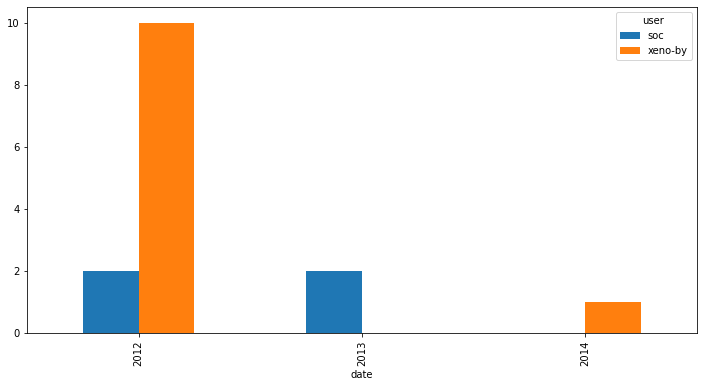

In [41]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

by_author = data[data['user'].isin(authors)]
by_file = by_author[by_author['file'] == file]

grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

by_file_wide.plot(kind='bar', figsize=(12,6))

# 4. Conclusion

Looking for parts of the system that have been recently changed, we had found the file ```src/compiler/scala/reflect/reify/phases/Calculate.scal``` as one of the most pull resquest. We used this information to see who are the people most involved in this part of the proyect. But also is something that we can replicate for different files depending what we are interested, because its a good start point to understand a this open source project or even contribute.